In [ ]:
from google.colab import files
files.upload()

Saving Jeera_New.xlsx to Jeera_New.xlsx


{'Jeera_New.xlsx': b'PK\x03\x04\x14\x00\x00\x00\x08\x00\xe3\x84\xa2XFZ\xc1\x0c\x82\x00\x00\x00\xb1\x00\x00\x00\x10\x00\x00\x00docProps/app.xmlM\x8eM\x0b\xc20\x10D\xffJ\xe9\xddnU\xf0 1 \xd4\xa3\xe0\xc9{H76\x90dCv\x85\xfc|S\xc1\x8f\xdb<\xde0\x8c\xba\x15\xcaX\xc4#w5\x86\xc4\xa7~\x11\xc9G\x00\xb6\x0bF\xc3C\xd3\xa9\x19G%\x1aiX\x1e@\xcey\x8b\x13\xd9g\xc4$\xb0\x1b\xc7\x03`\x15L3\xce\x9b\xfc\x1d\xec\xb5:\xe7\x1c\xbc5\xe2)\xe9\xab\xb7\x85\x98\x9ct\x97j1(\xf8\x97k\xf3\x8e\x85\xd7\xbc\x1f\xb6o\xf9a\x05\xbf\x93\xfa\x05PK\x03\x04\x14\x00\x00\x00\x08\x00\xe3\x84\xa2X\x0f`\x13\xdc\xee\x00\x00\x00+\x02\x00\x00\x11\x00\x00\x00docProps/core.xml\xcd\x92\xcfJ\xc40\x10\x87_Ero\'m\xb5`\xe8\xf6\xa2xR\x10\\P\xbc\x85dv7\xd8\xfc!\x19i\xf7\xedM\xebn\x17\xd1\x07\xf0\x98\x99_\xbe\xf9\x06\xa6SA(\x1f\xf19\xfa\x80\x91\x0c\xa6\xab\xc9\x0e.\t\x156\xec@\x14\x04@R\x07\xb42\x959\xe1rs\xe7\xa3\x95\x94\x9fq\x0fA\xaa\x0f\xb9G\xa89o\xc1"I-I\xc2\x0c,\xc2Jd}\xa7\x95P\x11%\xf9x\xc2k\xb5\xe2\xc3g\x1c\x16\x98V\x80\x03Zt\x94\xa0*+`

In [ ]:
import pandas as pd
df = pd.read_excel('Jeera_New.xlsx')

In [ ]:
df

,mean_intensity,median_intensity,mode_intensity,std_intensity,var_intensity,skewness,kurtosis,Outcome
0,148.063277,120.131433,110.895344,34.987920,1010.997577,-0.353397,0.315893,0
1,131.997108,141.790241,113.174922,35.374342,1835.814220,0.047758,-0.256878,0
2,143.599300,144.000000,151.000000,45.717650,2090.103000,0.075447,-0.374720,1
3,127.101000,125.000000,106.000000,41.739590,1742.194000,0.312799,-0.146860,1
4,143.219386,125.733337,116.197277,49.317467,1750.437352,-0.249806,-0.413075,0
...,...,...,...,...,...,...,...,...
445,147.462000,148.000000,154.000000,43.427480,1885.946000,0.069385,-0.288390,1
446,124.423225,122.111781,128.282189,48.969801,1416.544346,-0.460121,-0.283696,0
447,134.049278,123.137532,103.744853,49.235235,1883.477952,0.080690,-0.344891,0
448,120.365079,131.733733,149.024536,39.401993,1888.032196,0.000759,-0.386568,0


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

In [ ]:
# Show basic information
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mean_intensity    450 non-null    float64
 1   median_intensity  450 non-null    float64
 2   mode_intensity    450 non-null    float64
 3   std_intensity     450 non-null    float64
 4   var_intensity     450 non-null    float64
 5   skewness          450 non-null    float64
 6   kurtosis          450 non-null    float64
 7   Outcome           450 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 28.2 KB
None
       mean_intensity  median_intensity  mode_intensity  std_intensity  \
count      450.000000        450.000000      450.000000     450.000000   
mean       138.092752        138.458582      137.977563      40.312178   
std         10.174317         10.236853       19.354399       4.927128   
min        102.532900         98.000000       23.000000      30.400501   


In [ ]:
# Split features and target
X = df.drop(columns=["Outcome"])  # Replace 'Outcome' with the name of your target column
y = df["Outcome"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Define logistic regression with regularization and solver as hyperparameters
param_grid = {
    "C": [0.01, 0.1, 1, 10, 100],  # Regularization strength
    "penalty": ["l1", "l2"],  # Type of regularization
    "solver": ["liblinear", "saga"]  # Solvers for L1 regularization
}

In [ ]:
# Grid search for best hyperparameters
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [ ]:
# Best parameters and best model
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
# Using best model to predict on test set
y_pred = grid_search.predict(X_test_scaled)

In [ ]:
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", accuracy)

Test Set Accuracy: 0.6888888888888889


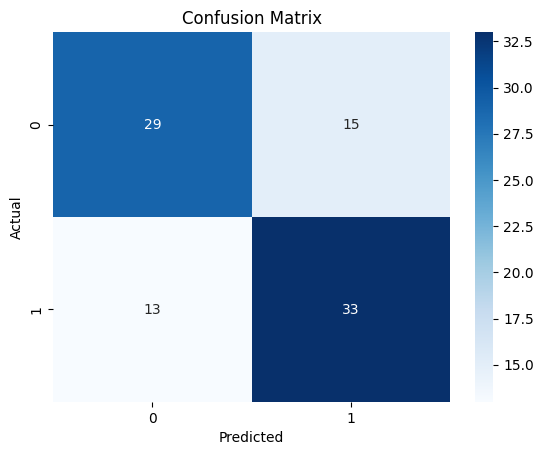

In [ ]:
# Confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.66      0.67        44
           1       0.69      0.72      0.70        46

    accuracy                           0.69        90
   macro avg       0.69      0.69      0.69        90
weighted avg       0.69      0.69      0.69        90



In [ ]:
# Trying Random Forest for comparison
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Simple Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

In [ ]:
# Accuracy of Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

Random Forest Accuracy: 0.9333333333333333


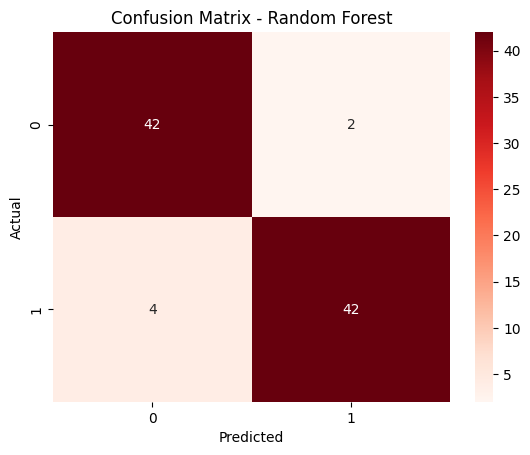

In [ ]:
# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Reds')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        44
           1       0.95      0.91      0.93        46

    accuracy                           0.93        90
   macro avg       0.93      0.93      0.93        90
weighted avg       0.93      0.93      0.93        90



In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb

In [ ]:
# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting rounds
    'max_depth': [3, 5, 7],  # Maximum depth of trees
    'learning_rate': [0.01, 0.1, 0.3],  # Learning rate for the boosting process
    'subsample': [0.8, 1],  # Proportion of samples to use for each boosting round
    'colsample_bytree': [0.8, 1]  # Proportion of features to use for each tree
}

In [ ]:
# Initialize GridSearchCV with XGBoost classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1],
                         'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1]},
             scoring='accuracy')

In [ ]:
# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1}


In [ ]:
# Predict using the best model from GridSearchCV
y_pred = grid_search.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", accuracy)

Test Set Accuracy: 0.9


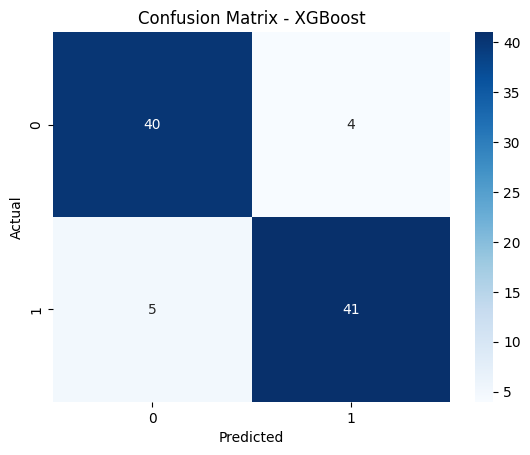

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90        44
           1       0.91      0.89      0.90        46

    accuracy                           0.90        90
   macro avg       0.90      0.90      0.90        90
weighted avg       0.90      0.90      0.90        90



In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


In [ ]:
# Define the parameter grid for AdaBoost
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of boosting rounds
    'learning_rate': [0.01, 0.1, 1],  # Learning rate for the boosting process
    'base_estimator__max_depth': [1, 2, 3]  # Maximum depth of the Decision Tree base classifier
}

# Initialize AdaBoost with Decision Tree as the base estimator
base_estimator = DecisionTreeClassifier()  # Weak classifier
ada_model = AdaBoostClassifier(base_estimator=base_estimator, random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(ada_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model with GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Best Hyperparameters: {'base_estimator__max_depth': 3, 'learning_rate': 1, 'n_estimators': 200}


In [ ]:
# Predict on the test set using the best model
y_pred = grid_search.predict(X_test_scaled)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", accuracy)

Test Set Accuracy: 0.9333333333333333


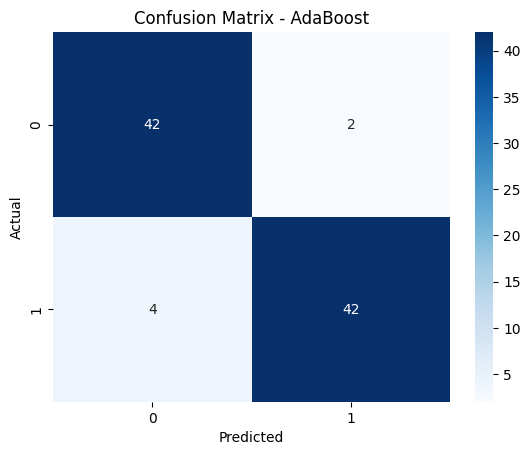

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        44
           1       0.95      0.91      0.93        46

    accuracy                           0.93        90
   macro avg       0.93      0.93      0.93        90
weighted avg       0.93      0.93      0.93        90



In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - AdaBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# Define the parameter grid for Gradient Boosting
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting rounds
    'learning_rate': [0.01, 0.1, 0.3],  # Learning rate for boosting
    'max_depth': [3, 5, 7],  # Maximum depth of the base decision trees
    'subsample': [0.8, 1],  # Proportion of samples used for each boosting round
    'min_samples_split': [2, 4],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2]  # Minimum samples required at each leaf node
}

# Initialize Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(gb_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300, 'subsample': 0.8}


In [ ]:
# Predict on the test set using the best model
y_pred = grid_search.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", accuracy)

Test Set Accuracy: 0.9444444444444444


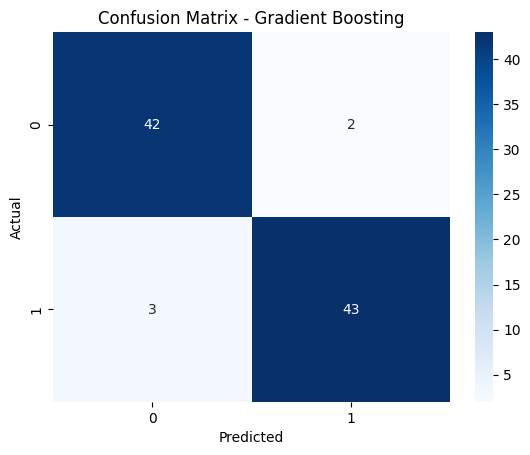

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        44
           1       0.96      0.93      0.95        46

    accuracy                           0.94        90
   macro avg       0.94      0.94      0.94        90
weighted avg       0.94      0.94      0.94        90



In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Gradient Boosting")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.naive_bayes import GaussianNB

Test Set Accuracy: 0.7333333333333333


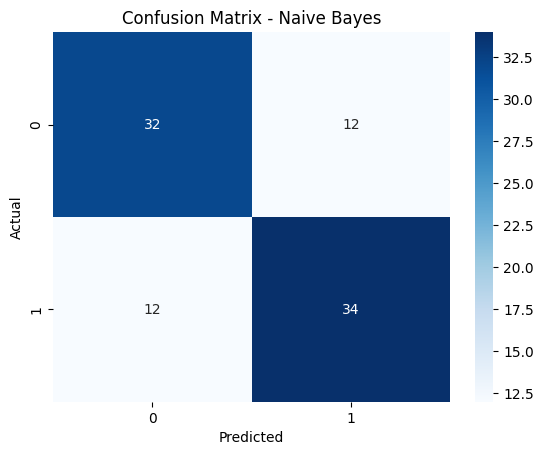

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.73      0.73        44
           1       0.74      0.74      0.74        46

    accuracy                           0.73        90
   macro avg       0.73      0.73      0.73        90
weighted avg       0.73      0.73      0.73        90



In [ ]:
# Initialize and train Gaussian Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = nb_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
import lightgbm as lgb

In [ ]:
# Define the parameter grid for LightGBM
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting rounds
    'learning_rate': [0.01, 0.1, 0.3],  # Learning rate
    'max_depth': [3, 5, 7],  # Maximum depth of the base decision trees
    'num_leaves': [31, 63],  # Number of leaves for each tree (increases model complexity)
    'subsample': [0.8, 1],  # Proportion of samples used for each boosting round
    'colsample_bytree': [0.8, 1],  # Proportion of features used for each boosting round
    'reg_alpha': [0, 0.1],  # L1 regularization
    'reg_lambda': [0, 0.1]  # L2 regularization
}

In [ ]:
# Initialize LightGBM Classifier
lgb_model = lgb.LGBMClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(lgb_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Test Set Accuracy: 0.9111111111111111


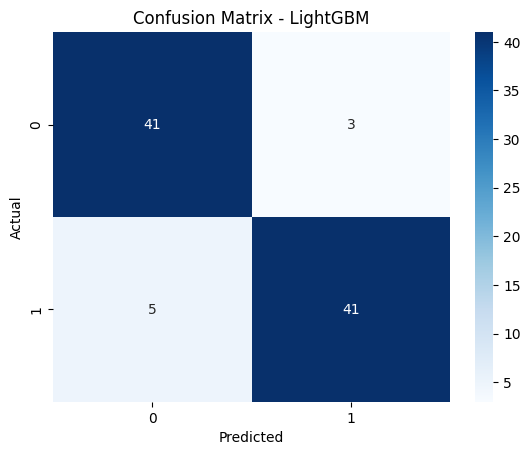

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91        44
           1       0.93      0.89      0.91        46

    accuracy                           0.91        90
   macro avg       0.91      0.91      0.91        90
weighted avg       0.91      0.91      0.91        90



In [ ]:
y_pred = grid_search.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - LightGBM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))


In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier

In [ ]:
# Base learners
ada = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Meta-learner
meta_learner = LogisticRegression()

# Stacking model
stacking_model = StackingClassifier(
    estimators=[('ada', ada), ('gb', gb)],
    final_estimator=meta_learner
)

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Predict on the test set
y_pred = stacking_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", accuracy)

Test Set Accuracy: 0.9222222222222223


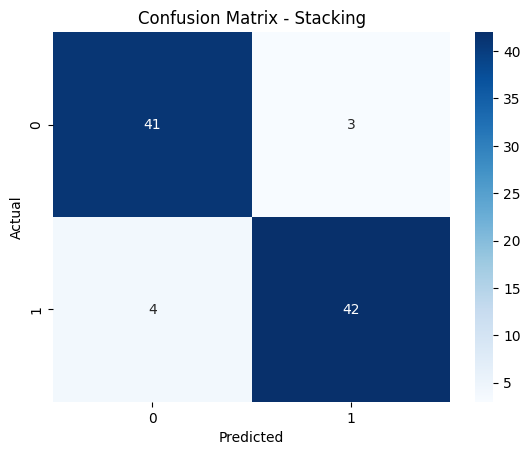

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        44
           1       0.93      0.91      0.92        46

    accuracy                           0.92        90
   macro avg       0.92      0.92      0.92        90
weighted avg       0.92      0.92      0.92        90



In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Stacking")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Test Set Accuracy: 0.8666666666666667


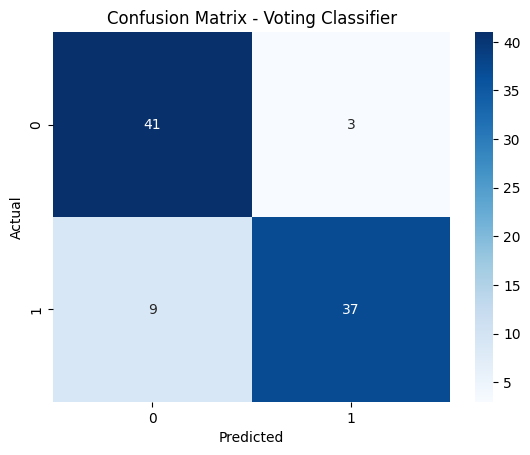

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87        44
           1       0.93      0.80      0.86        46

    accuracy                           0.87        90
   macro avg       0.87      0.87      0.87        90
weighted avg       0.87      0.87      0.87        90



In [ ]:
from sklearn.ensemble import VotingClassifier

# Voting classifier with hard voting
voting_model = VotingClassifier(estimators=[('ada', ada), ('gb', gb)], voting='hard')

# Train the voting classifier
voting_model.fit(X_train, y_train)

# Predict on the test set
y_pred = voting_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Voting Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# 2. Split features and target
X = df.drop(columns=["Outcome"])
y = df["Outcome"]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


Test Set Accuracy: 0.6444444444444445


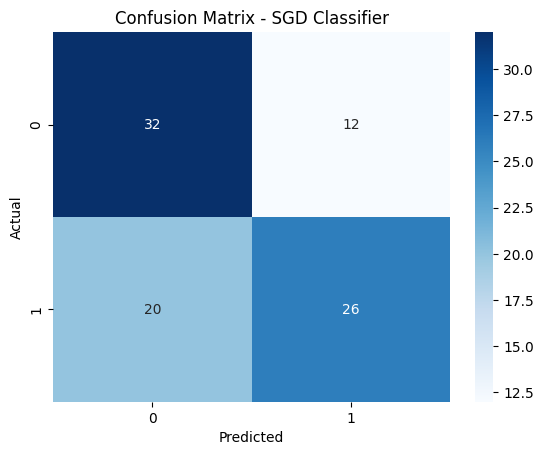

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.73      0.67        44
           1       0.68      0.57      0.62        46

    accuracy                           0.64        90
   macro avg       0.65      0.65      0.64        90
weighted avg       0.65      0.64      0.64        90



In [ ]:
# 3. Preprocess the data if necessary
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# 5. Train the SGD Classifier
sgd_classifier = SGDClassifier(loss='log', max_iter=1000, random_state=42)  # Example parameters, adjust as needed
sgd_classifier.fit(X_train, y_train)

# 6. Evaluate the model
y_pred = sgd_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - SGD Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skle

Best Hyperparameters: {'alpha': 0.1, 'loss': 'hinge', 'max_iter': 1000, 'penalty': 'l2', 'random_state': 42}
Test Set Accuracy: 0.7222222222222222


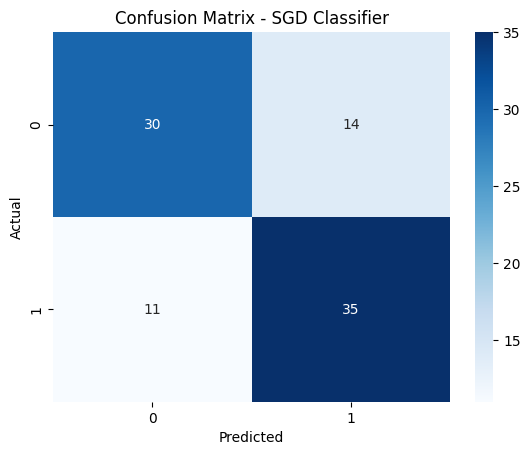

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.68      0.71        44
           1       0.71      0.76      0.74        46

    accuracy                           0.72        90
   macro avg       0.72      0.72      0.72        90
weighted avg       0.72      0.72      0.72        90



In [ ]:
from sklearn.model_selection import GridSearchCV

# 3. Preprocess the data if necessary (e.g., scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# 5. Train the SGD Classifier with hyperparameter tuning
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1],  # Regularization parameter
    'penalty': ['l1', 'l2', 'elasticnet'],  # Penalty term
    'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],  # Loss function
    'max_iter': [1000, 2000, 3000],  # Maximum number of iterations
    'random_state': [42]  # Random state for reproducibility
}

sgd_classifier = GridSearchCV(SGDClassifier(), param_grid, cv=5, scoring='accuracy')
sgd_classifier.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", sgd_classifier.best_params_)

# 6. Evaluate the model
y_pred = sgd_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - SGD Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


Test Set Accuracy: 0.9555555555555556


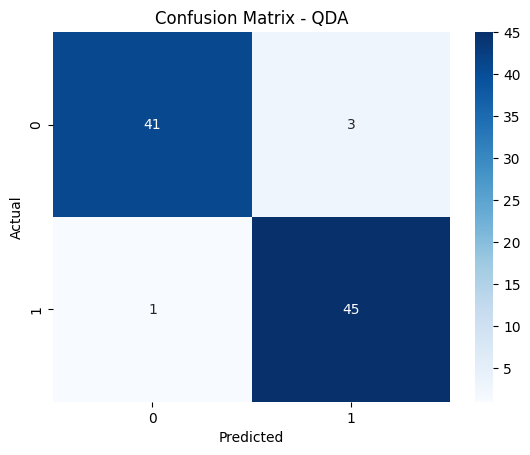

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        44
           1       0.94      0.98      0.96        46

    accuracy                           0.96        90
   macro avg       0.96      0.96      0.96        90
weighted avg       0.96      0.96      0.96        90



In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train the QDA model
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

# Make predictions
y_pred = qda.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - QDA")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

Test Set Accuracy: 0.9666666666666667


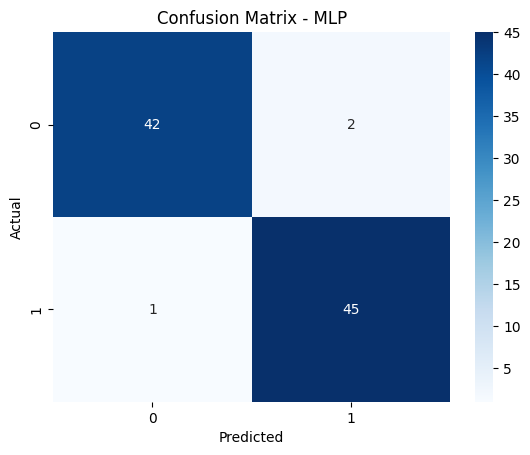

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97        44
           1       0.96      0.98      0.97        46

    accuracy                           0.97        90
   macro avg       0.97      0.97      0.97        90
weighted avg       0.97      0.97      0.97        90



In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train the MLP model
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)  # Example parameters, adjust as needed
mlp.fit(X_train, y_train)

# Make predictions
y_pred = mlp.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - MLP")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

Test Set Accuracy: 0.5888888888888889


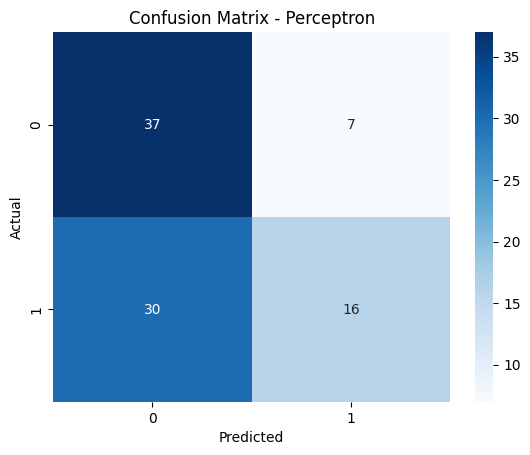

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.84      0.67        44
           1       0.70      0.35      0.46        46

    accuracy                           0.59        90
   macro avg       0.62      0.59      0.57        90
weighted avg       0.63      0.59      0.56        90



In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train the Perceptron model
perceptron = Perceptron(max_iter=1000, random_state=42)  # Example parameters, adjust as needed
perceptron.fit(X_train, y_train)

# Make predictions
y_pred = perceptron.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Perceptron")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
import pandas as pd
from sklearn.ensemble import StackingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define base models for stacking
base_models = [
    ('qda', QuadraticDiscriminantAnalysis()),
    ('mlp', MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)),
    ('adaboost', AdaBoostClassifier(n_estimators=100, random_state=42))
]

# Define the final estimator for stacking
final_estimator = LogisticRegression()

# Create the stacking classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=final_estimator, cv=5)

In [ ]:
# Train the stacking classifier
stacking_clf.fit(X_train_scaled, y_train)

# Make predictions
y_pred = stacking_clf.predict(X_test_scaled)

Test Set Accuracy (Stacking Classifier): 0.9666666666666667


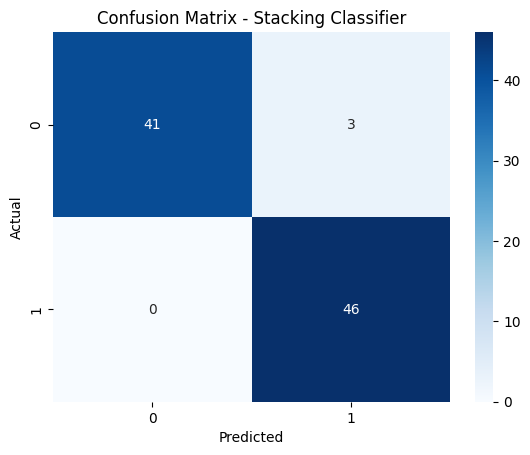

Classification Report (Stacking Classifier):
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        44
           1       0.94      1.00      0.97        46

    accuracy                           0.97        90
   macro avg       0.97      0.97      0.97        90
weighted avg       0.97      0.97      0.97        90



In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy (Stacking Classifier):", accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Stacking Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("Classification Report (Stacking Classifier):")
print(classification_report(y_test, y_pred))

Test Set Accuracy (Stacking Classifier): 0.9666666666666667


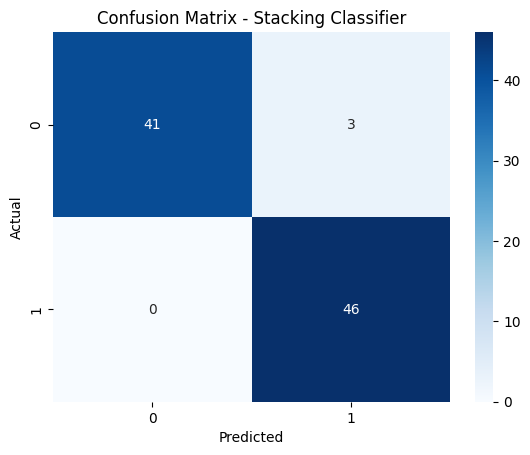

Classification Report (Stacking Classifier):
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        44
           1       0.94      1.00      0.97        46

    accuracy                           0.97        90
   macro avg       0.97      0.97      0.97        90
weighted avg       0.97      0.97      0.97        90



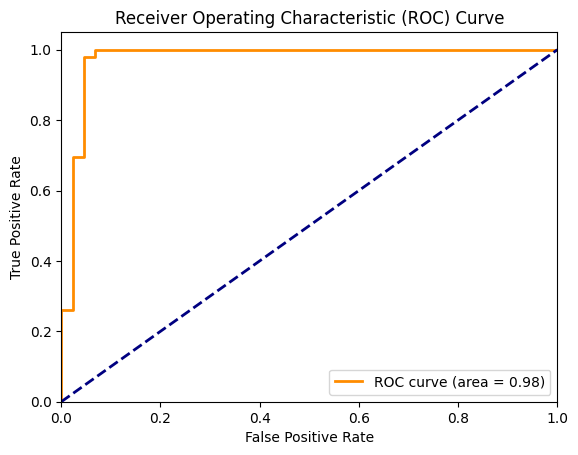

In [ ]:
import pandas as pd
from sklearn.ensemble import StackingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X and y are defined

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define base models for stacking
base_models = [
    ('qda', QuadraticDiscriminantAnalysis()),
    ('mlp', MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)),
    ('adaboost', AdaBoostClassifier(n_estimators=100, random_state=42))
]

# Define the final estimator for stacking
final_estimator = LogisticRegression()

# Create the stacking classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=final_estimator, cv=5)

# Train the stacking classifier
stacking_clf.fit(X_train_scaled, y_train)

# Make predictions
y_pred = stacking_clf.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy (Stacking Classifier):", accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Stacking Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("Classification Report (Stacking Classifier):")
print(classification_report(y_test, y_pred))

# ROC Curve and AUC
y_pred_proba = stacking_clf.predict_proba(X_test_scaled)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
